In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("datasets train/bogor.csv")

In [3]:
df.head()

,created_at,text,tweet_en
0,Fri Aug 12 07:47:35 +0000 2016,Berasa robot njirÃ°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥ (at ...,Feeling robotic njirÃ ° ÂŸÂ˜Â ¥ Ã ° ÂŸÂ˜Â ¥ Ã ...
1,Thu Dec 28 13:51:34 +0000 2017,Dinas Kesehatan Kota Bogor Resmikan Puskesmas ...,Bogor City Health Office Inaugurates Inap Pusk...
2,Wed Feb 01 13:00:52 +0000 2017,Sekda Kota Bogor: RS Yang Bekerja Sama Dengan ...,Regional Secretary of Bogor City: Hospitals in...
3,Fri Jun 06 03:10:03 +0000 2014,"RT TribunNews: 64 Kelurahan di Kota Bogor, Raw...","RT TribunNews: 64 Kelurahan in Bogor City, Pro..."
4,Sat Apr 23 22:25:50 +0000 2016,makasiih loooh udh di tengokin semalem n bikin...,"Thank you, I have seen you last night and made..."


In [4]:
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [5]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Fri Aug 12 07:47:35 +0000 2016,Berasa robot njirÃ°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥ (at ...,Feeling robotic njirÃ ° ÂŸÂ˜Â ¥ Ã ° ÂŸÂ˜Â ¥ Ã ...,0.200000,-0.10
1,Thu Dec 28 13:51:34 +0000 2017,Dinas Kesehatan Kota Bogor Resmikan Puskesmas ...,Bogor City Health Office Inaugurates Inap Pusk...,0.000000,0.00
2,Wed Feb 01 13:00:52 +0000 2017,Sekda Kota Bogor: RS Yang Bekerja Sama Dengan ...,Regional Secretary of Bogor City: Hospitals in...,0.000000,0.00
3,Fri Jun 06 03:10:03 +0000 2014,"RT TribunNews: 64 Kelurahan di Kota Bogor, Raw...","RT TribunNews: 64 Kelurahan in Bogor City, Pro...",0.000000,0.00
4,Sat Apr 23 22:25:50 +0000 2016,makasiih loooh udh di tengokin semalem n bikin...,"Thank you, I have seen you last night and made...",0.066667,0.00
...,...,...,...,...,...
1073,Sat Aug 12 09:15:30 +0000 2017,At Rumah Sakit Umum Daerah Kota Bogor Ã¢Â€Â” h...,At Bogor City Regional General Hospital Ã ¢ Â ...,0.500000,0.05
1074,Tue Sep 22 05:22:33 +0000 2015,"#pendampinganODMK Diki Darmaji (33), pemeriksa...","#pendimbingODMK Diki Darmaji (33), examination...",0.000000,0.00
1075,Tue Nov 01 00:10:17 +0000 2016,06:51 WIB.Simpang RSUD Kota #Bogor. Lalin terp...,06:51 WIB. Simpang City Hospital #Bogor. Traff...,0.500000,0.25
1076,Fri Mar 04 14:15:47 +0000 2016,RSUD Kota Bogor Bantah Tolak Pasien BPJS - Poj...,Bogor City Hospital Denies Rejecting BPJS Pati...,0.000000,0.00


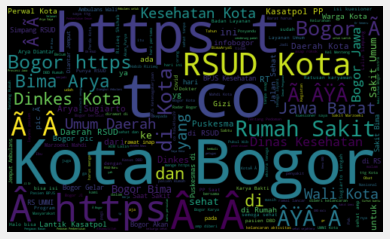

In [6]:
#wordcloud
allwords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [7]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Fri Aug 12 07:47:35 +0000 2016,Berasa robot njirÃ°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥ (at ...,Feeling robotic njirÃ ° ÂŸÂ˜Â ¥ Ã ° ÂŸÂ˜Â ¥ Ã ...,0.200000,-0.10,Negative
1,Thu Dec 28 13:51:34 +0000 2017,Dinas Kesehatan Kota Bogor Resmikan Puskesmas ...,Bogor City Health Office Inaugurates Inap Pusk...,0.000000,0.00,Neutral
2,Wed Feb 01 13:00:52 +0000 2017,Sekda Kota Bogor: RS Yang Bekerja Sama Dengan ...,Regional Secretary of Bogor City: Hospitals in...,0.000000,0.00,Neutral
3,Fri Jun 06 03:10:03 +0000 2014,"RT TribunNews: 64 Kelurahan di Kota Bogor, Raw...","RT TribunNews: 64 Kelurahan in Bogor City, Pro...",0.000000,0.00,Neutral
4,Sat Apr 23 22:25:50 +0000 2016,makasiih loooh udh di tengokin semalem n bikin...,"Thank you, I have seen you last night and made...",0.066667,0.00,Neutral
...,...,...,...,...,...,...
1073,Sat Aug 12 09:15:30 +0000 2017,At Rumah Sakit Umum Daerah Kota Bogor Ã¢Â€Â” h...,At Bogor City Regional General Hospital Ã ¢ Â ...,0.500000,0.05,Positive
1074,Tue Sep 22 05:22:33 +0000 2015,"#pendampinganODMK Diki Darmaji (33), pemeriksa...","#pendimbingODMK Diki Darmaji (33), examination...",0.000000,0.00,Neutral
1075,Tue Nov 01 00:10:17 +0000 2016,06:51 WIB.Simpang RSUD Kota #Bogor. Lalin terp...,06:51 WIB. Simpang City Hospital #Bogor. Traff...,0.500000,0.25,Positive
1076,Fri Mar 04 14:15:47 +0000 2016,RSUD Kota Bogor Bantah Tolak Pasien BPJS - Poj...,Bogor City Hospital Denies Rejecting BPJS Pati...,0.000000,0.00,Neutral


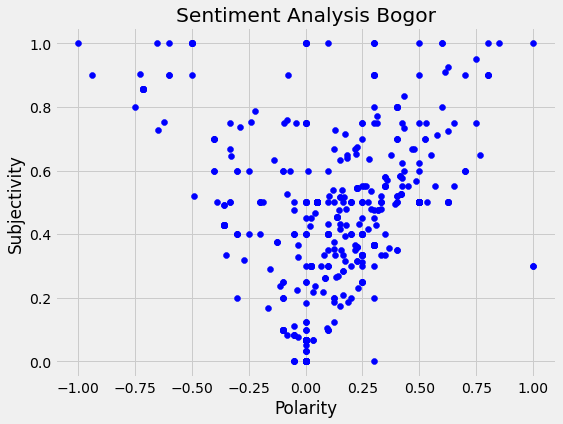

In [8]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Bogor")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

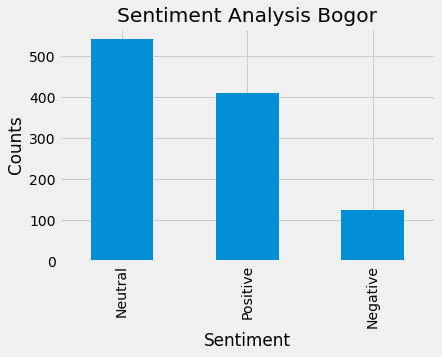

In [9]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Bogor")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [10]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]

In [11]:
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Fri Aug 12 07:47:35 +0000 2016,Berasa robot njirÃ°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥Ã°ÂŸÂ˜Â¥ (at ...,0.200000,-0.10,Negative
1,Thu Dec 28 13:51:34 +0000 2017,Dinas Kesehatan Kota Bogor Resmikan Puskesmas ...,0.000000,0.00,Neutral
2,Wed Feb 01 13:00:52 +0000 2017,Sekda Kota Bogor: RS Yang Bekerja Sama Dengan ...,0.000000,0.00,Neutral
3,Fri Jun 06 03:10:03 +0000 2014,"RT TribunNews: 64 Kelurahan di Kota Bogor, Raw...",0.000000,0.00,Neutral
4,Sat Apr 23 22:25:50 +0000 2016,makasiih loooh udh di tengokin semalem n bikin...,0.066667,0.00,Neutral
...,...,...,...,...,...
1073,Sat Aug 12 09:15:30 +0000 2017,At Rumah Sakit Umum Daerah Kota Bogor Ã¢Â€Â” h...,0.500000,0.05,Positive
1074,Tue Sep 22 05:22:33 +0000 2015,"#pendampinganODMK Diki Darmaji (33), pemeriksa...",0.000000,0.00,Neutral
1075,Tue Nov 01 00:10:17 +0000 2016,06:51 WIB.Simpang RSUD Kota #Bogor. Lalin terp...,0.500000,0.25,Positive
1076,Fri Mar 04 14:15:47 +0000 2016,RSUD Kota Bogor Bantah Tolak Pasien BPJS - Poj...,0.000000,0.00,Neutral
